In [2]:
%load_ext autoreload
%autoreload 2
import sys, os, platform
import os
import sys
module_path = os.path.abspath(os.path.join('../spectraltree'))
if module_path not in sys.path:
    sys.path.append(module_path)
#sys.path.append(os.path.join(os.path.dirname(sys.path[0]),'spectraltree'))
#sys.path.append(os.path.join(sys.path[0],'spectraltree'))
import pickle
import reconstruct_tree as rt
import utils
import generation
import compare_methods
import numpy as np
from dendropy.interop import raxml
from dendropy.model.discrete import simulate_discrete_chars, Jc69
from dendropy.calculate.treecompare import symmetric_difference
import seaborn as sns
import matplotlib.pylab as plt

In [ ]:
m_vec = np.arange(100,550,100)
print(m_vec)
num_reps = 10
#tree_list = [utils.lopsided_tree(utils.default_namespace(m), m) for m in m_vec]
tree_list = [utils.lopsided_tree(m,utils.default_namespace(m)) for m in m_vec]
jc = generation.Jukes_Cantor()
delta_vec = [0.92]
NJ = rt.NeighborJoining(rt.JC_similarity_matrix)
SNJ = rt.SpectralNeighborJoining(rt.JC_similarity_matrix)
methods = [NJ,SNJ]
mutation_rates = [jc.similarity2t(delta)  for delta in delta_vec]
Ns = [2000]
results = compare_methods.experiment(tree_list = tree_list, sequence_model = jc, Ns = Ns, methods=methods, mutation_rates = mutation_rates, reps_per_tree=num_reps,savepath='caterpillar_delta_92.pkl',folder = '../data/',overwrite=True)




[100 200 300 400 500]
==== Beginning Experiment =====
	 Transition:  Jukes Cantor
	 5 trees
	 1 sample sizes: 2000
	 2 methods <reconstruct_tree.NeighborJoining object at 0x7f9d8c068278> <reconstruct_tree.SpectralNeighborJoining object at 0x7f9d8c068ba8>
	 1 mutation rates: 0.0208
	 10 reps
1 / 100
2 / 100
3 / 100
4 / 100
5 / 100
6 / 100
7 / 100
8 / 100
9 / 100
10 / 100
11 / 100
12 / 100
13 / 100
14 / 100
15 / 100
16 / 100
17 / 100
18 / 100
19 / 100
20 / 100
21 / 100


m
100    20
200    20
300    20
400    20
500    20
Name: RF_log, dtype: int64


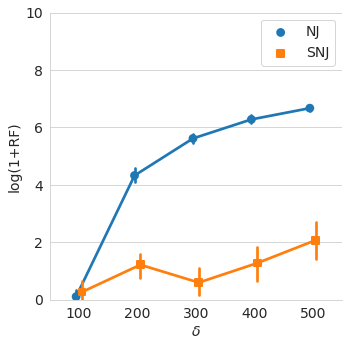

In [7]:
jc = generation.Jukes_Cantor()
df = compare_methods.results2frame(results)
df['RF_log'] = np.log(1+df['RF'])
sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 14})
h = compare_methods.accuracy(df,x="m",y="RF_log")
h.set(ylim=(0,10))
new_labels = ['NJ', 'SNJ']
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, new_labels)
plt.ylabel(r'log(1+RF)')
plt.xlabel(r'$\delta$')

plt.savefig('../data/caterpillar_n_2000_delta_92_scan_m.eps',format='eps')

In [3]:
f = open('../data/caterpillar_delta_92.pkl','rb')
results = pickle.load(f)

In [10]:
print(compare_methods.results2frame(results))

F1%   RF  correct    m  \
0    98.989899    4    False  100   
1    97.979798    8    False  100   
2    99.494949    2    False  100   
3    97.979798    8    False  100   
4    99.494949    2    False  100   
5    99.494949    2    False  100   
6    98.484848    6    False  100   
7   100.000000    0     True  100   
8   100.000000    0     True  100   
9    94.949495   20    False  100   
10  100.000000    0     True  100   
11   97.474747   10    False  100   
12  100.000000    0     True  100   
13  100.000000    0     True  100   
14  100.000000    0     True  100   
15   98.989899    4    False  100   
16   98.989899    4    False  100   
17   98.484848    6    False  100   
18   97.979798    8    False  100   
19   98.484848    6    False  100   
20   86.180905  110    False  200   
21   92.211055   62    False  200   
22   91.206030   70    False  200   
23   96.984925   24    False  200   
24   88.190955   94    False  200   
25   97.989950   16    False  200   
26   85.1758